# System Diagrams

In [1]:
%load_ext jupyter_tikz

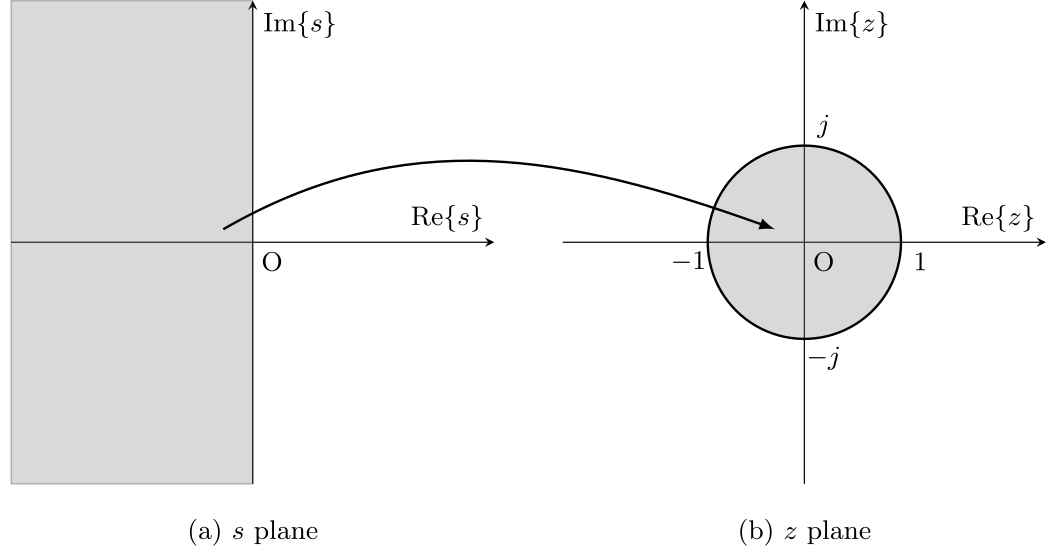

In [2]:
%%tikz -p=\include{prefix.tex} -sc=3 -S s_to_z.svg
\begin{tikzpicture}

    % s-plane (left)
    \begin{axis}[
        axis lines = middle,
        xmin=-2.5, xmax=2.5, ymin=-2.5, ymax=2.5,
        xlabel={\small Re\{$s$\}},
        ylabel={\small Im\{$s$\}},
        xtick=\empty, ytick=\empty,
        enlargelimits=false,
        clip=false,
        axis equal image
    ]
        % Shaded left half-plane
        \addplot [pattern=north east lines, domain=-2.5:0, samples=2, fill=gray, opacity=0.3] {2.5} |- (-2.5,-2.5) -- cycle;
        
        % Origin Label
        \node at (axis cs: 0.2,-0.2) {\small O};
        
        % Label for (a)
        \node at (axis cs: 0, -3.0) {\small (a) $s$ plane};
    \end{axis}

    % z-plane (right)
    \begin{axis}[
        axis lines = middle,
        xmin=-2.5, xmax=2.5, ymin=-2.5, ymax=2.5,
        xlabel={\small Re\{$z$\}},
        ylabel={\small Im\{$z$\}},
        xtick=\empty, ytick=\empty,
        enlargelimits=false,
        clip=false,
        axis equal image,
        xshift=6.5cm
    ]
        % Shaded unit disk
        \addplot [pattern=north east lines, draw=black, fill=gray, opacity=0.3, domain=0:360, samples=100] ({cos(x)}, {sin(x)});
        
        % Unit circle outline
        \addplot [thick, domain=0:360, samples=100] ({cos(x)}, {sin(x)});
        
        % Labels on unit circle
        \node at (axis cs: 1.2,-0.2) {\small $1$};
        \node at (axis cs: -1.2,-0.2) {\small $-1$};
        \node at (axis cs: 0.2, 1.2) {\small $j$};
        \node at (axis cs: 0.2, -1.2) {\small $-j$};
        
        % Origin Label
        \node at (axis cs: 0.2,-0.2) {\small O};
        
        % Label for (b)
        \node at (axis cs: 0, -3.0) {\small (b) $z$ plane};
    \end{axis}

    % Mapping arrow
    \draw[thick,->] (2.5,3) to[out=30,in=160] (9,3);

\end{tikzpicture}

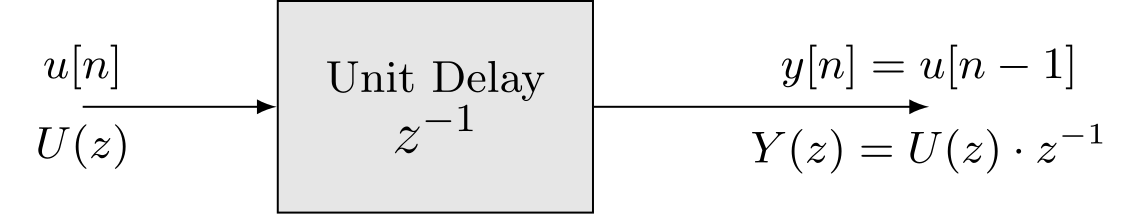

In [10]:
%%tikz -p=\include{prefix.tex} -sc=5 -S unit_delay.svg
\begin{tikzpicture}[auto, node distance=25mm]
	% blocks 1st level
	\node[input] (in){};
	\node[block, right of=in, minimum height=1.5cm, text width=2cm, align=center](sys1){Unit Delay  \\ \large $z^{-1}$};
	\node[output, right of=sys1, xshift=1cm] (out){};
	
	% lines
	\draw[->] (in) node[above]{$u[n]$} node[below]{$U(z)$} --(sys1) node[left]{} ;
   	\draw[->] (sys1) node[right]{}--(out) node[above]{$y[n] = u[n-1]$} node[below]{$Y(z) = U(z)\cdot z^{-1}$};
\end{tikzpicture}

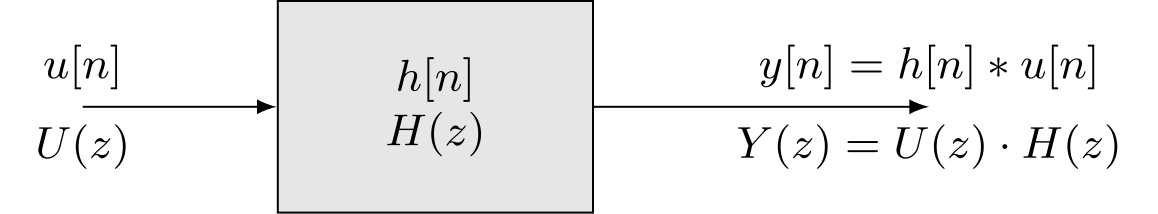

In [9]:
%%tikz -p=\include{prefix.tex} -sc=5 -S transfer_function.svg
\begin{tikzpicture}[auto, node distance=25mm]
	% blocks 1st level
	\node[input] (in){};
	\node[block, right of=in, minimum height=1.5cm, text width=2cm, align=center](sys1){$h[n]$ \\ $H(z)$};
	\node[output, right of=sys1, xshift=1cm] (out){};
	
	% lines
	\draw[->] (in) node[above]{$u[n]$} node[below]{$U(z)$} --(sys1) node[left]{} ;
   	\draw[->] (sys1) node[right]{}--(out) node[above]{$y[n] = h[n]*u[n]$} node[below]{$Y(z) = U(z)\cdot H(z)$};
\end{tikzpicture}

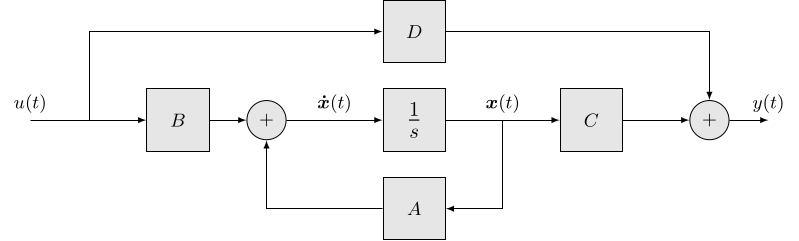

In [43]:
%%tikz -p=\include{prefix.tex} -sc=0.5 --dpi=300 -r -S ss_cont.png
\begin{tikzpicture}[auto, node distance=1.5cm,>=latex]
    % Nodes
    \node [input] (input) {}; 
    \node [right of=input, node distance=1cm] (branch1) {};
    \node [block, right of=branch1] (B) {$B$};
    \node [sum, right of=B, node distance=1.5cm] (sum) {+};
    \node [block, right of=sum, node distance=2.5cm] (Integrator) {\Large $\frac{1}{s}$};
    \node [right of=Integrator] (branch2) {};
    \node [block, right of=branch2] (C) {$C$};
    \node [sum, right of=C, node distance=2cm] (sum2) {+};
    \node [block, above of=Integrator] (D) {$D$};
    \node [block, below of=Integrator] (A) {$A$};
    \node [output, right of=sum2, node distance=1cm] (output) {};
    \node [right of=sum, node distance=1cm] {};
    
    % Arrows
    \draw [->] (input) node[above]{$u(t)$} --  (B);
    \draw [->] (B) -- (sum);
    \draw [->] (sum) -- node[above]{$\boldsymbol{\dot{x}}(t)$} (Integrator);
    \draw [->] (Integrator) -- node[above]{$\boldsymbol{x}(t)$}(C);
    \draw [->] (C) -- (sum2);
    \draw [->] (sum2) --  (output) node[above]{$y(t)$};
    \draw [->] (branch1.center) |- (D);
    \draw [->] (D) -| (sum2);
    \draw [->] (branch2.center) |- (A);
    \draw [->] (A) -| (sum);
\end{tikzpicture}

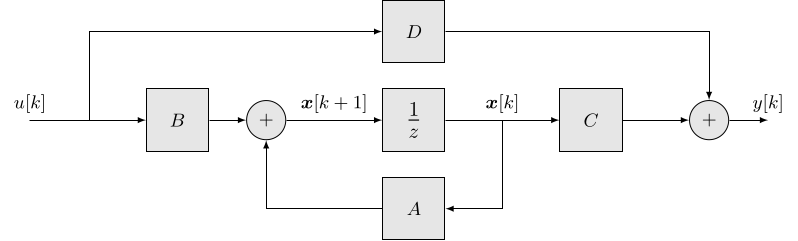

In [44]:
%%tikz -p=\include{prefix.tex} -sc=0.5 --dpi=300 -r -S ss_disc.png
\begin{tikzpicture}[auto, node distance=1.5cm,>=latex]
    % Nodes
    \node [input] (input) {}; 
    \node [right of=input, node distance=1cm] (branch1) {};
    \node [block, right of=branch1] (B) {$B$};
    \node [sum, right of=B, node distance=1.5cm] (sum) {+};
    \node [block, right of=sum, node distance=2.5cm] (Integrator) {\Large $\frac{1}{z}$};
    \node [right of=Integrator] (branch2) {};
    \node [block, right of=branch2] (C) {$C$};
    \node [sum, right of=C, node distance=2cm] (sum2) {+};
    \node [block, above of=Integrator] (D) {$D$};
    \node [block, below of=Integrator] (A) {$A$};
    \node [output, right of=sum2, node distance=1cm] (output) {};
    \node [right of=sum, node distance=1cm] {};
    
    % Arrows
    \draw [->] (input) node[above]{$u[k]$} --  (B);
    \draw [->] (B) -- (sum);
    \draw [->] (sum) -- node[above]{$\boldsymbol{x}[k+1]$} (Integrator);
    \draw [->] (Integrator) -- node[above]{$\boldsymbol{x}[k]$}(C);
    \draw [->] (C) -- (sum2);
    \draw [->] (sum2) --  (output) node[above]{$y[k]$};
    \draw [->] (branch1.center) |- (D);
    \draw [->] (D) -| (sum2);
    \draw [->] (branch2.center) |- (A);
    \draw [->] (A) -| (sum);
\end{tikzpicture}

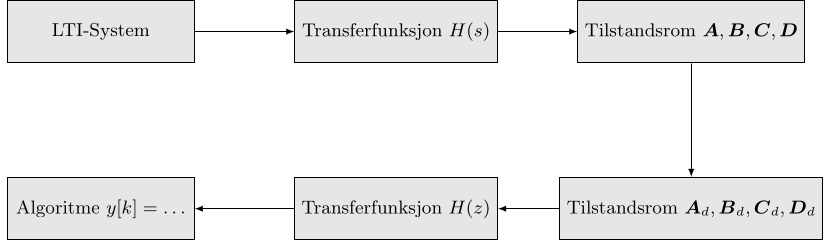

In [45]:
%%tikz -p=\include{prefix.tex} -sc=0.5 --dpi=300 -r -S discretization_workflow.png
\begin{tikzpicture}[auto, node distance=1.5cm,>=latex]
    % Nodes
    \node [block, minimum width=9em] (cont_sys) {LTI-System};
    \node [block, right of=cont_sys, node distance=5cm, minimum width=9em] (cont_tf) {Transferfunksjon $H(s)$};
    \node [block, right of=cont_tf, node distance=5cm, minimum width=9em] (cont_ss) {Tilstandsrom $\boldsymbol{A}, \boldsymbol{B}, \boldsymbol{C}, \boldsymbol{D}$};
    \node [block, below of=cont_ss, node distance=3cm, minimum width=9em] (disc_ss) {Tilstandsrom $\boldsymbol{A}_d, \boldsymbol{B}_d, \boldsymbol{C}_d, \boldsymbol{D}_d$};
    \node [block, below of=cont_tf, node distance=3cm, minimum width=9em] (disc_tf) {Transferfunksjon $H(z)$};
    \node [block, below of=cont_sys, node distance=3cm, minimum width=9em] (disc_sys) {Algoritme $y[k] = \ldots$};
    % Arrows
    \draw [->] (cont_sys) --  (cont_tf);
    \draw [->] (cont_tf) --  (cont_ss);
    \draw [->] (cont_ss) --  (disc_ss);
    \draw [->] (disc_ss) --  (disc_tf);
    \draw [->] (disc_tf) --  (disc_sys);
\end{tikzpicture}

# Circuit Diagrams